# Importing all the libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Reading

In [3]:
house = pd.read_csv('train.csv')

In [4]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.shape # (Rows, Columns)

(1460, 81)

In [6]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Lets check the skewness of the data

In [7]:
house.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# EDA

In [9]:
# List of few important variables to perform EDA
variables = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

### Univariate Analysis

In [10]:
house[variables].describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,1057.429452,1.565068,1971.267808
std,79442.502883,1.382997,525.480383,0.747315,438.705324,0.550916,30.202904
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000
25%,129975.000000,5.000000,1129.500000,1.000000,795.750000,1.000000,1954.000000
50%,163000.000000,6.000000,1464.000000,2.000000,991.500000,2.000000,1973.000000
75%,214000.000000,7.000000,1776.750000,2.000000,1298.250000,2.000000,2000.000000
max,755000.000000,10.000000,5642.000000,4.000000,6110.000000,3.000000,2010.000000


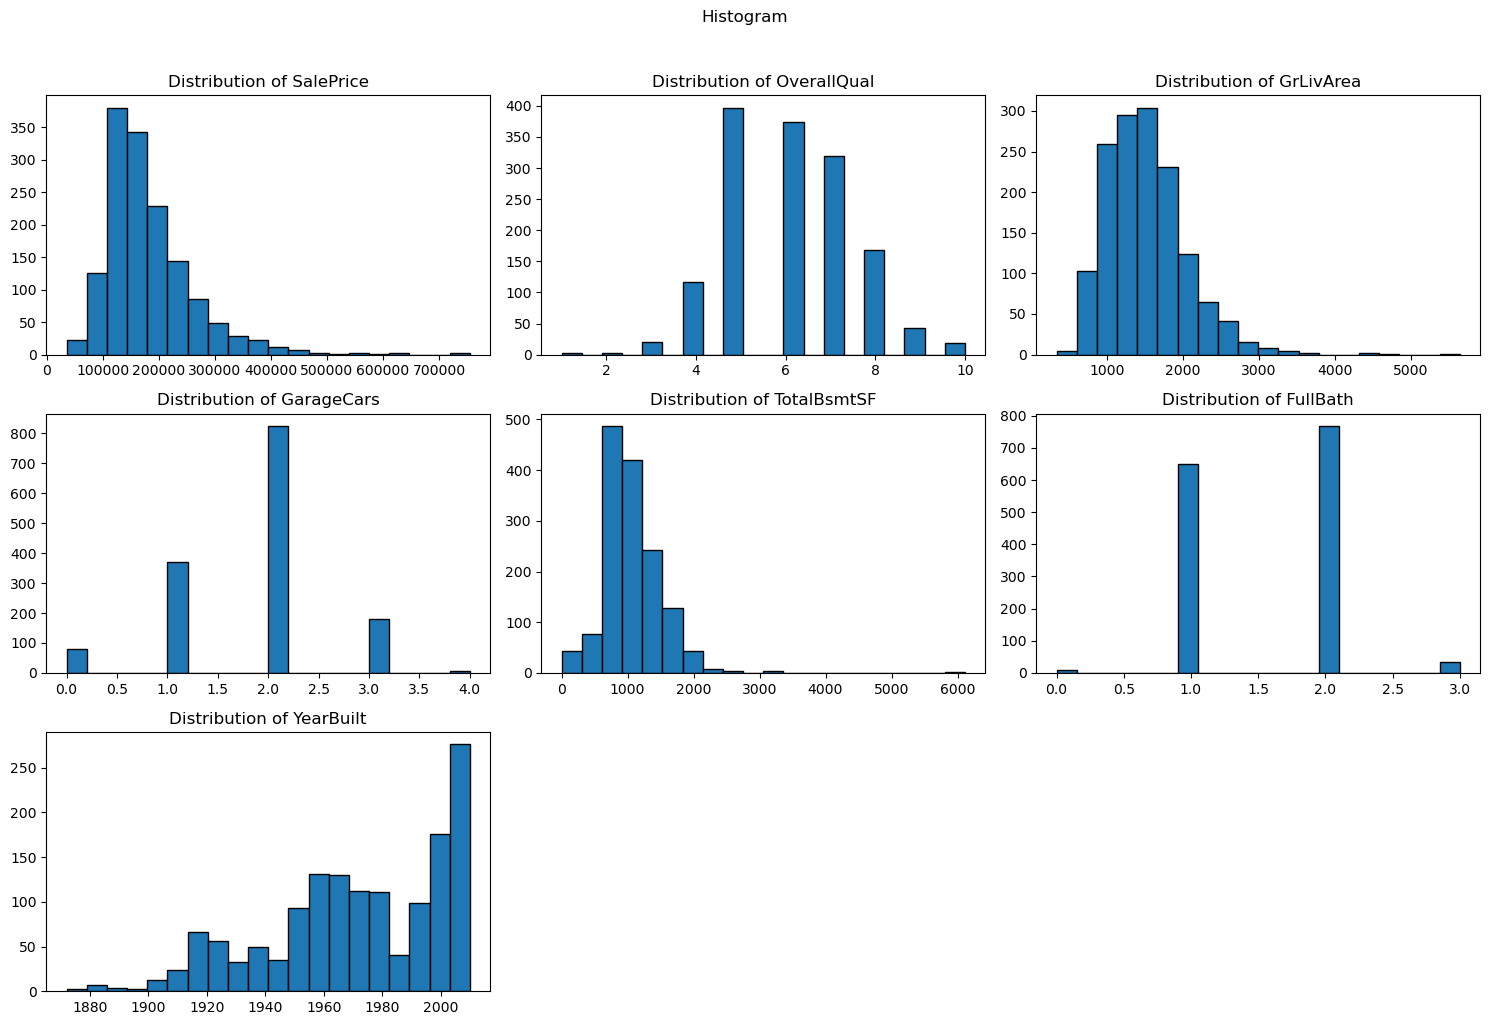

In [11]:
# Histogram
plt.figure(figsize=(15, 10))
for i, column in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    plt.hist(house[column], bins=20, edgecolor='black')
    plt.title(f'Distribution of {column}')

plt.suptitle('Histogram', y=1.02)
plt.tight_layout()
plt.show()

### Bivariate Analysis

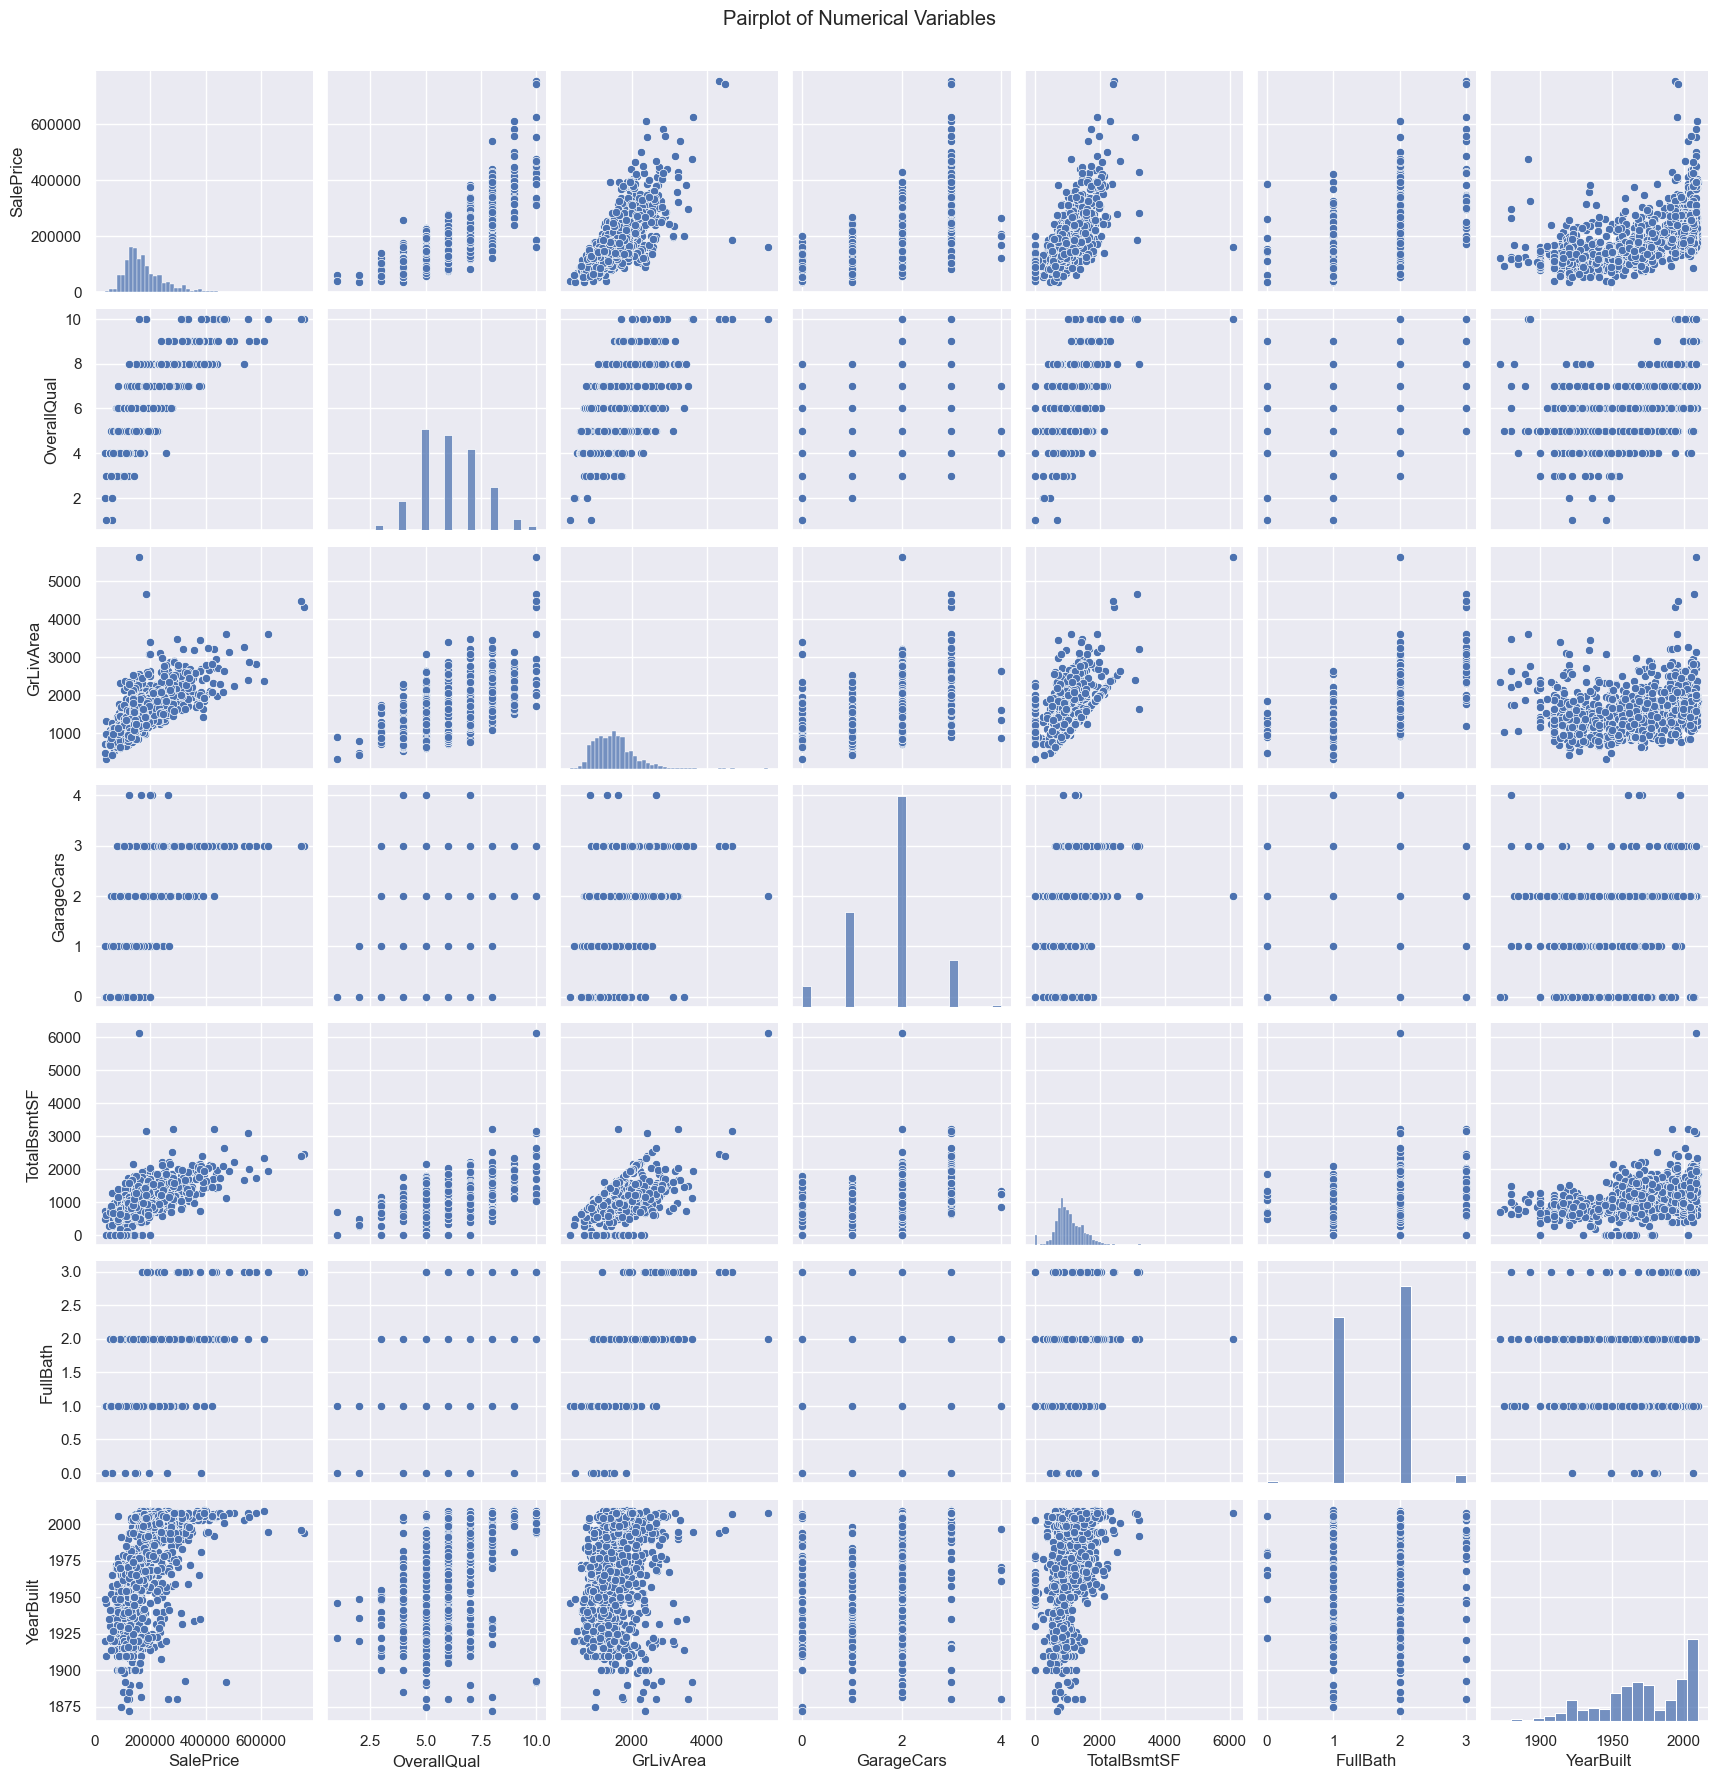

In [12]:
# pairplot
sns.set()
sns.pairplot(house[variables], size=2.5)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

### Multivariate Analysis

<Axes: >

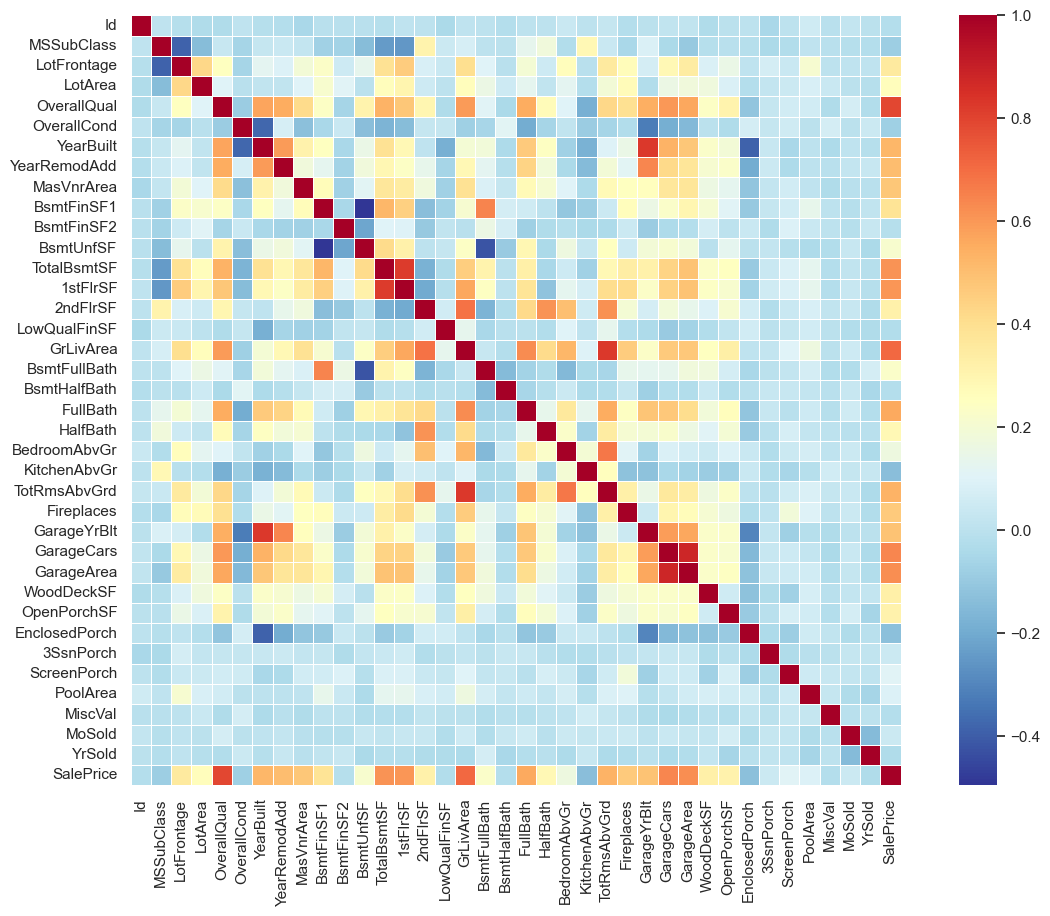

In [13]:
#correlation matrix
plt.subplots(figsize=(15, 10))
sns.heatmap(house.corr(), cmap='RdYlBu_r', linewidths=.5, square=True)

# Data Cleaning

### Checking Null Values

In [14]:
# Defining the function to check null values
def check_null_values():
    house.columns[house.isnull().any()]
    null_values = house.isnull().sum()
    null_values = null_values[null_values>0]
    null_values.sort_values(inplace=True, ascending=False)
    print(null_values)

In [15]:
check_null_values()

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


### Imputing Null Values

Among these variables, null of the categorical variables have some meaning. So, We replace those null values by "None"

In [16]:
cat_vars_null = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in cat_vars_null:
    house[i].fillna("None", inplace=True)

In [17]:
check_null_values()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Electrical       1
dtype: int64


Since `LotFrontage` has too many null values, we will be dropping `LotFrontage`

In [18]:
house.drop("LotFrontage", axis=1, inplace=True)

In [19]:
check_null_values()

GarageYrBlt    81
MasVnrArea      8
Electrical      1
dtype: int64


Since, `Electrical` have only one null value, lets drop a row where `Electrical` is null. Because, by dropping one row won't effect that much to our data.

In [20]:
house = house.dropna(subset=['Electrical'])

In [21]:
check_null_values()

GarageYrBlt    81
MasVnrArea      8
dtype: int64


Now, lets fill these null values with the median of the respective variables.

In [22]:
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)

In [23]:
check_null_values()

Series([], dtype: int64)


Finally we were able to handle all the null values.

# Data Preparation

In [24]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [25]:
numerical_vars = list((house.dtypes[(house.dtypes == 'int64') | (house.dtypes == float)]).index)
categorical_vars = list((house.dtypes[house.dtypes == object]).index)

In [26]:
numerical_vars

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [27]:
categorical_vars

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Now, since we have the list of the categorical and numerical variables, first we manage categorical variables. There are a lot of categorical variables. Creating dummy variables for all the categories will result to the excess number of columns. Lets just convert respective categories to numerical values.

In [28]:
for variable in categorical_vars:
    unique_values = set(house[variable])
    value_mapping = {value: index for index, value in enumerate(unique_values)}
    house[variable] = house[variable].map(value_mapping)

In [29]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,2,1,0,0,4,...,0,2,0,1,0,2,2008,2,3,208500
1,2,20,3,9600,1,2,1,0,0,0,...,0,2,0,1,0,5,2007,2,3,181500
2,3,60,3,11250,1,2,2,0,0,4,...,0,2,0,1,0,9,2008,2,3,223500
3,4,70,3,9550,1,2,2,0,0,1,...,0,2,0,1,0,2,2006,2,5,140000
4,5,60,3,14260,1,2,2,0,0,0,...,0,2,0,1,0,12,2008,2,3,250000


Finally we converted categorical variables values to the numerical values.

Now, lets check the skewness of the target variable

<Axes: xlabel='SalePrice', ylabel='Density'>

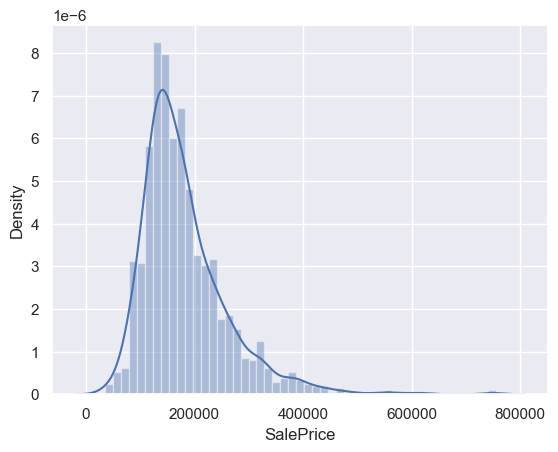

In [30]:
sns.distplot(house["SalePrice"])

Logarithmic transformation for the target variable

<Axes: xlabel='SalePrice', ylabel='Density'>

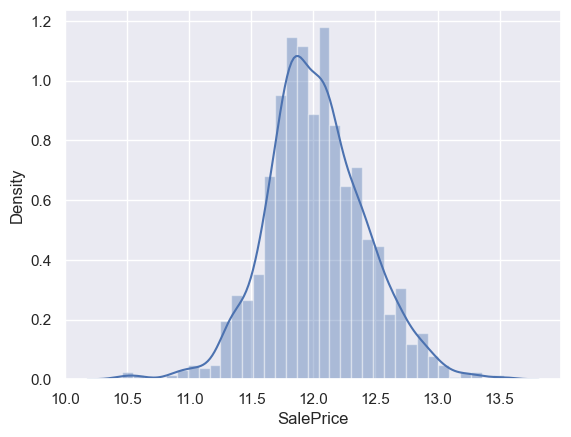

In [31]:
sns.distplot(np.log(house["SalePrice"]))

Lets make a new column called `TransformedSalePrice` to have log transformed `SalePrice`

In [32]:
house["TransformedSalePrice"] = np.log(house["SalePrice"])

In [33]:
X = house.drop(["Id", "SalePrice", "TransformedSalePrice"], axis=1)
y = house["TransformedSalePrice"]

In [34]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [35]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


### Lasso Regression

In [36]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021665,0.005548,0.003121,0.006243,0.0001,{'alpha': 0.0001},-0.081482,-0.100480,-0.099205,-0.096667,...,-0.094274,0.006823,1,-0.085277,-0.081689,-0.076234,-0.083894,-0.082102,-0.081839,0.003084
1,0.015715,0.000189,0.003136,0.006273,0.001,{'alpha': 0.001},-0.088967,-0.104503,-0.099256,-0.096339,...,-0.095570,0.006060,2,-0.090349,-0.084744,-0.078996,-0.083762,-0.086563,-0.084883,0.003705
2,0.015721,0.001465,0.000000,0.000000,0.01,{'alpha': 0.01},-0.097339,-0.103241,-0.103561,-0.098035,...,-0.099021,0.003984,3,-0.095753,-0.093732,-0.089283,-0.088128,-0.095096,-0.092398,0.003107
3,0.056048,0.021920,0.000000,0.000000,0.05,{'alpha': 0.05},-0.100177,-0.114616,-0.118195,-0.118624,...,-0.110325,0.008468,4,-0.106866,-0.105278,-0.101165,-0.102093,-0.105807,-0.104242,0.002213
4,0.035268,0.010786,0.003118,0.006235,0.1,{'alpha': 0.1},-0.104583,-0.124064,-0.126518,-0.124384,...,-0.117587,0.009183,8,-0.116685,-0.112355,-0.107958,-0.107105,-0.115256,-0.111872,0.003818


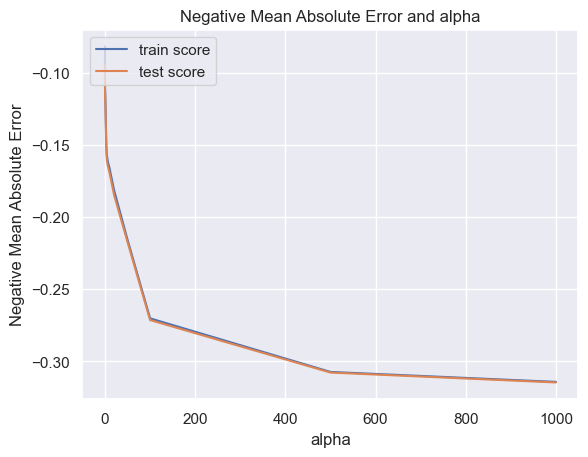

In [38]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [39]:
alpha = 0.1

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.1)

In [40]:
lasso.coef_

array([-6.12430603e-04, -0.00000000e+00,  1.69785861e-06,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.48547166e-03,  3.33110180e-03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.18355246e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        7.55991504e-05, -0.00000000e+00,  2.16599164e-05, -0.00000000e+00,
        1.40230229e-04, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.11959994e-05,  7.46567889e-05, -0.00000000e+00,
        2.77275541e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [41]:
model_parameters = list(lasso.coef_ )

In [42]:
# Creating a dataframe for the coefficients obtained from Lasso Regression
mod = list(zip(X.columns, model_parameters))

In [43]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coefficient']
para.head()

,Variable,Coefficient
0,MSSubClass,-0.000612
1,MSZoning,-0.000000
2,LotArea,0.000002
3,Street,0.000000
4,Alley,-0.000000


In [44]:
# sort the coefficients in ascending order
para = para.sort_values((['Coefficient']), axis = 0, ascending = False)
para.head(10)

,Variable,Coefficient
17,YearBuilt,0.003485
18,YearRemodAdd,0.003331
68,ScreenPorch,0.000373
60,GarageArea,0.000299
44,GrLivArea,0.000277
66,EnclosedPorch,0.000250
67,3SsnPorch,0.000177
64,WoodDeckSF,0.000162
36,TotalBsmtSF,0.000140
32,BsmtFinSF1,0.000076


In [45]:
# prediction on the test set(Using R2)
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8041160396425344
0.7104365113013817


In [46]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.2087631656763348


### Ridge Regression

In [47]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006254,0.007659,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.082266,-0.100570,-0.099287,-0.086131,...,-0.092570,0.007223,1,-0.084992,-0.081434,-0.076137,-0.083882,-0.081946,-0.081678,0.003055
1,0.003126,0.006252,0.009375,0.007655,0.001,{'alpha': 0.001},-0.082247,-0.100572,-0.099284,-0.088787,...,-0.093097,0.006822,2,-0.085001,-0.081443,-0.076139,-0.083916,-0.081952,-0.081690,0.003061
2,0.012602,0.004492,0.000000,0.000000,0.01,{'alpha': 0.01},-0.082067,-0.100594,-0.099253,-0.094538,...,-0.094215,0.006541,3,-0.085096,-0.081526,-0.076160,-0.084005,-0.082037,-0.081765,0.003087
3,0.003129,0.006259,0.004333,0.006101,0.05,{'alpha': 0.05},-0.081994,-0.100683,-0.099269,-0.096307,...,-0.094597,0.006643,4,-0.085511,-0.081879,-0.076314,-0.084036,-0.082409,-0.082030,0.003130
4,0.006283,0.007820,0.003133,0.006266,0.1,{'alpha': 0.1},-0.082844,-0.101017,-0.099496,-0.096581,...,-0.094966,0.006430,5,-0.085982,-0.082291,-0.076679,-0.084040,-0.082844,-0.082367,0.003113


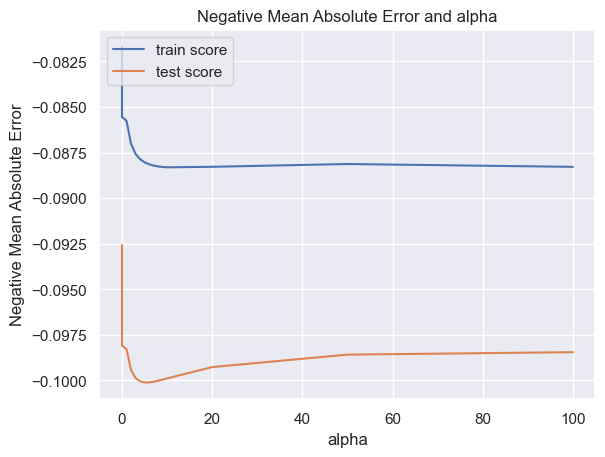

In [49]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [50]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.94819889e-04, -2.71858856e-02,  1.70190676e-06,  5.18158170e-02,
        9.62613863e-03,  4.25177685e-03, -1.42471760e-02, -6.42836420e-03,
        1.24836979e-04,  3.09279420e-02, -4.18765297e-04, -1.42381916e-03,
       -6.10783017e-02, -1.45894159e-02,  2.13863816e-03,  7.11077116e-02,
        5.01876150e-02,  1.90859966e-03,  7.93906555e-04, -8.86112687e-03,
        5.81286833e-03,  2.21602162e-03, -2.48478507e-03, -4.10254980e-04,
        2.09605512e-05, -7.75045443e-03, -2.09637645e-02,  1.05633302e-02,
       -1.72730767e-02, -1.40904742e-03,  5.35035478e-03, -1.63579984e-03,
        3.69004386e-05, -7.28315636e-03,  3.54067939e-05,  6.46839882e-06,
        7.87756272e-05,  5.18229858e-03, -8.67197053e-03,  5.95542751e-02,
       -3.67881326e-03,  2.05575146e-05,  3.55142012e-05,  1.00339682e-04,
        1.56411390e-04,  6.47211390e-02,  1.89602719e-02,  4.60293559e-02,
        2.87366666e-02,  2.35501926e-03, -2.97564318e-02,  2.05692005e-03,
        9.17850229e-03, -

In [51]:
model_parameters = list(ridge.coef_)
mod_ridge = list(zip(X.columns, model_parameters))

In [52]:
para_ridge = pd.DataFrame(mod_ridge)
para_ridge.columns = ['Variable', 'Coefficient']
# Sorting the coefficients in ascending order
para_ridge = para_ridge.sort_values((['Coefficient']), axis = 0, ascending = False)
para_ridge.head(10)

,Variable,Coefficient
70,PoolQC,0.154905
15,OverallQual,0.071108
45,BsmtFullBath,0.064721
59,GarageCars,0.063492
39,CentralAir,0.059554
3,Street,0.051816
16,OverallCond,0.050188
47,FullBath,0.046029
54,Fireplaces,0.033468
9,LandSlope,0.030928


In [53]:
# prediction on the test set(Using R2)
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8899784166088568
0.828275696544557


In [54]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.16076735082580962
